In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


Time series is a collection of data points collected at certain time intervals. They are analyzed to determine the long tern trend to forcast future. It is one of the most important part for any industries like Banking, Retail, Healthcare etc. It helps analyst and service chain manager to take effective decision.


# Different time series forcasting method.
 
* Autoregression (AR)
* Moving Average (MA)
* Autoregressive Moving Average (ARMA)
* Autoregressive Integrated Moving Average (ARIMA)
* Seasonal Autoregressive Integrated Moving-Average (SARIMA)
* Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
* Vector Autoregression (VAR)
* Vector Autoregression Moving-Average (VARMA)
* Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
* Simple Exponential Smoothing (SES)
* Holt Winter’s Exponential Smoothing (HWES)

In [2]:
#Import Basic  Librrries

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

#ML Librarries
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from statsmodels.tsa.ar_model import AR

from statsmodels.tsa.arima_model import ARMA, ARIMA

# Data Read

In [3]:
df = pd.read_csv("../input/sample-sales-data/sales_data_sample.csv", encoding = "unicode_escape")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
#Null /Missing value Check

df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
data=df.copy()

#Max min data duration

In [9]:
data["ORDERDATE"] = data["ORDERDATE"].astype("datetime64[ns]")

data["ORDERDATE"].max(), data["ORDERDATE"].min()

(Timestamp('2005-05-31 00:00:00'), Timestamp('2003-01-06 00:00:00'))

In [10]:
#Data Visulazion group by Mean

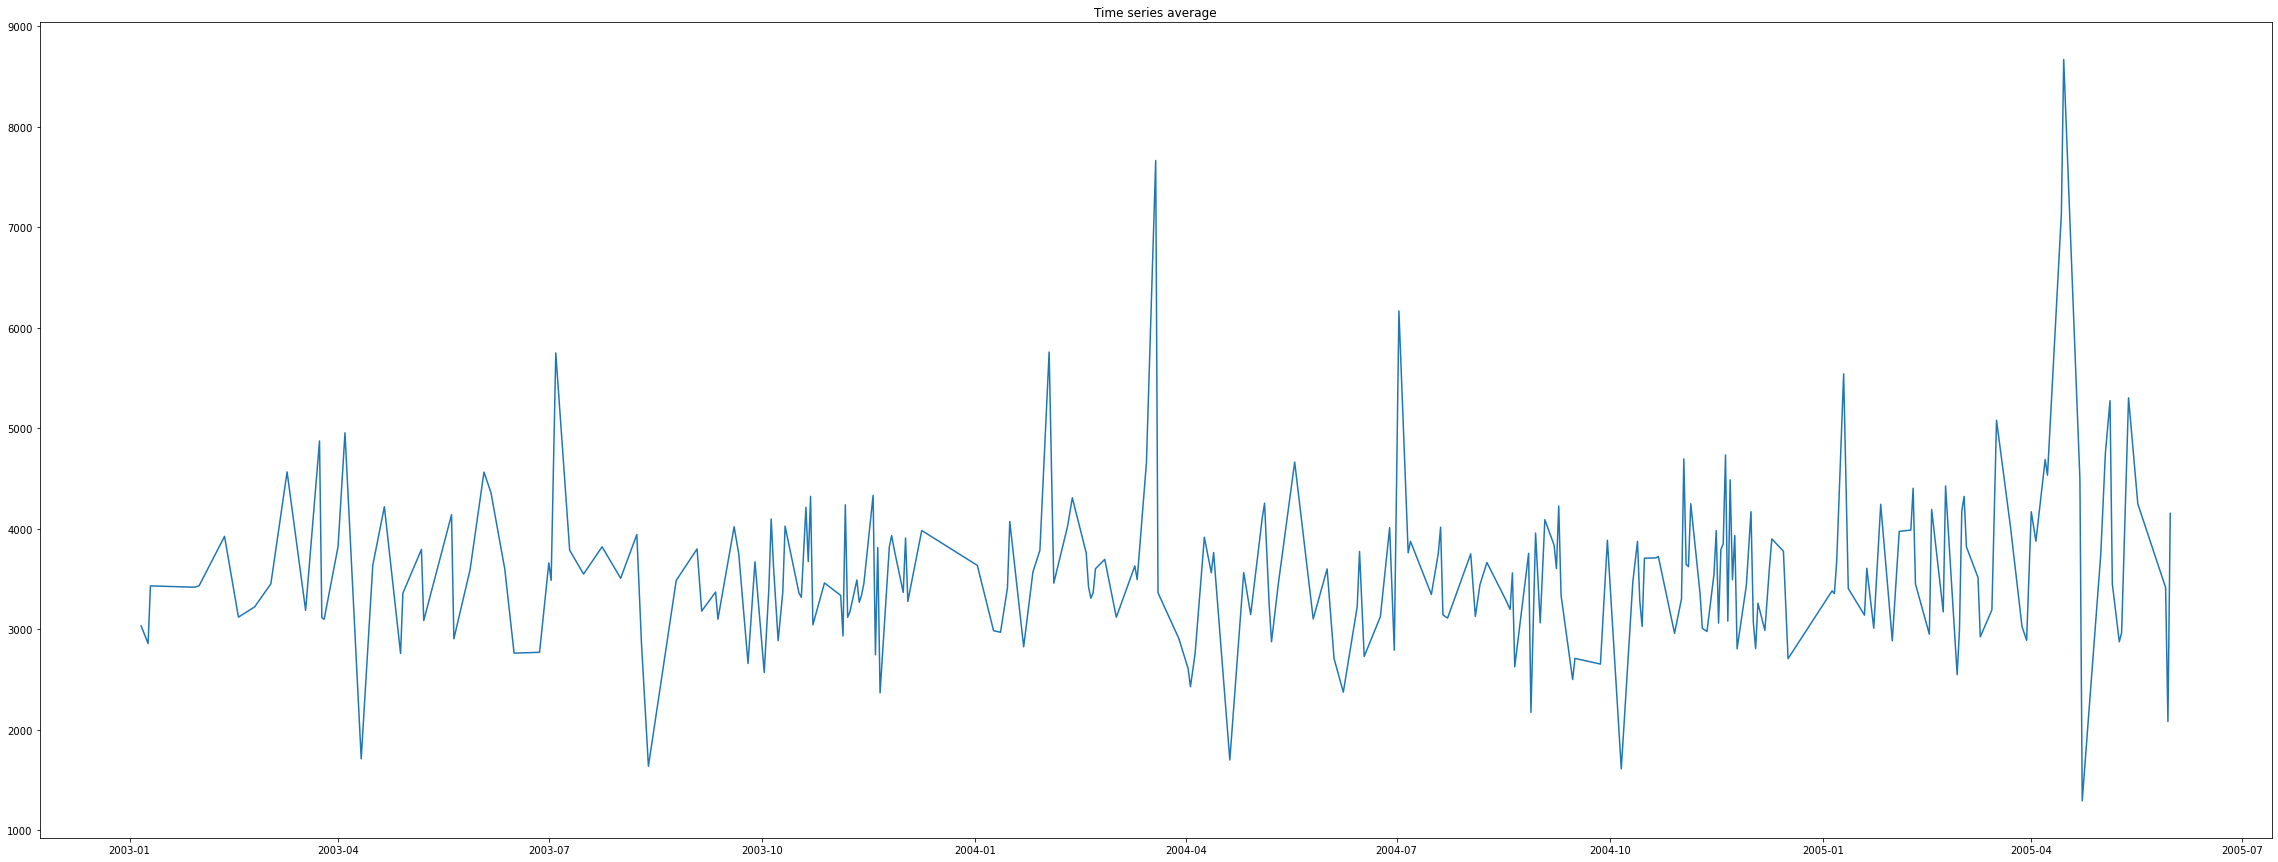

In [11]:
plt.figure(figsize =(40,15))

mean_group = data.groupby(["ORDERDATE"])["SALES"].mean()

plt.plot(mean_group)

plt.title("Time series average")

plt.show()

In [12]:
#Data Visulazion group by Median

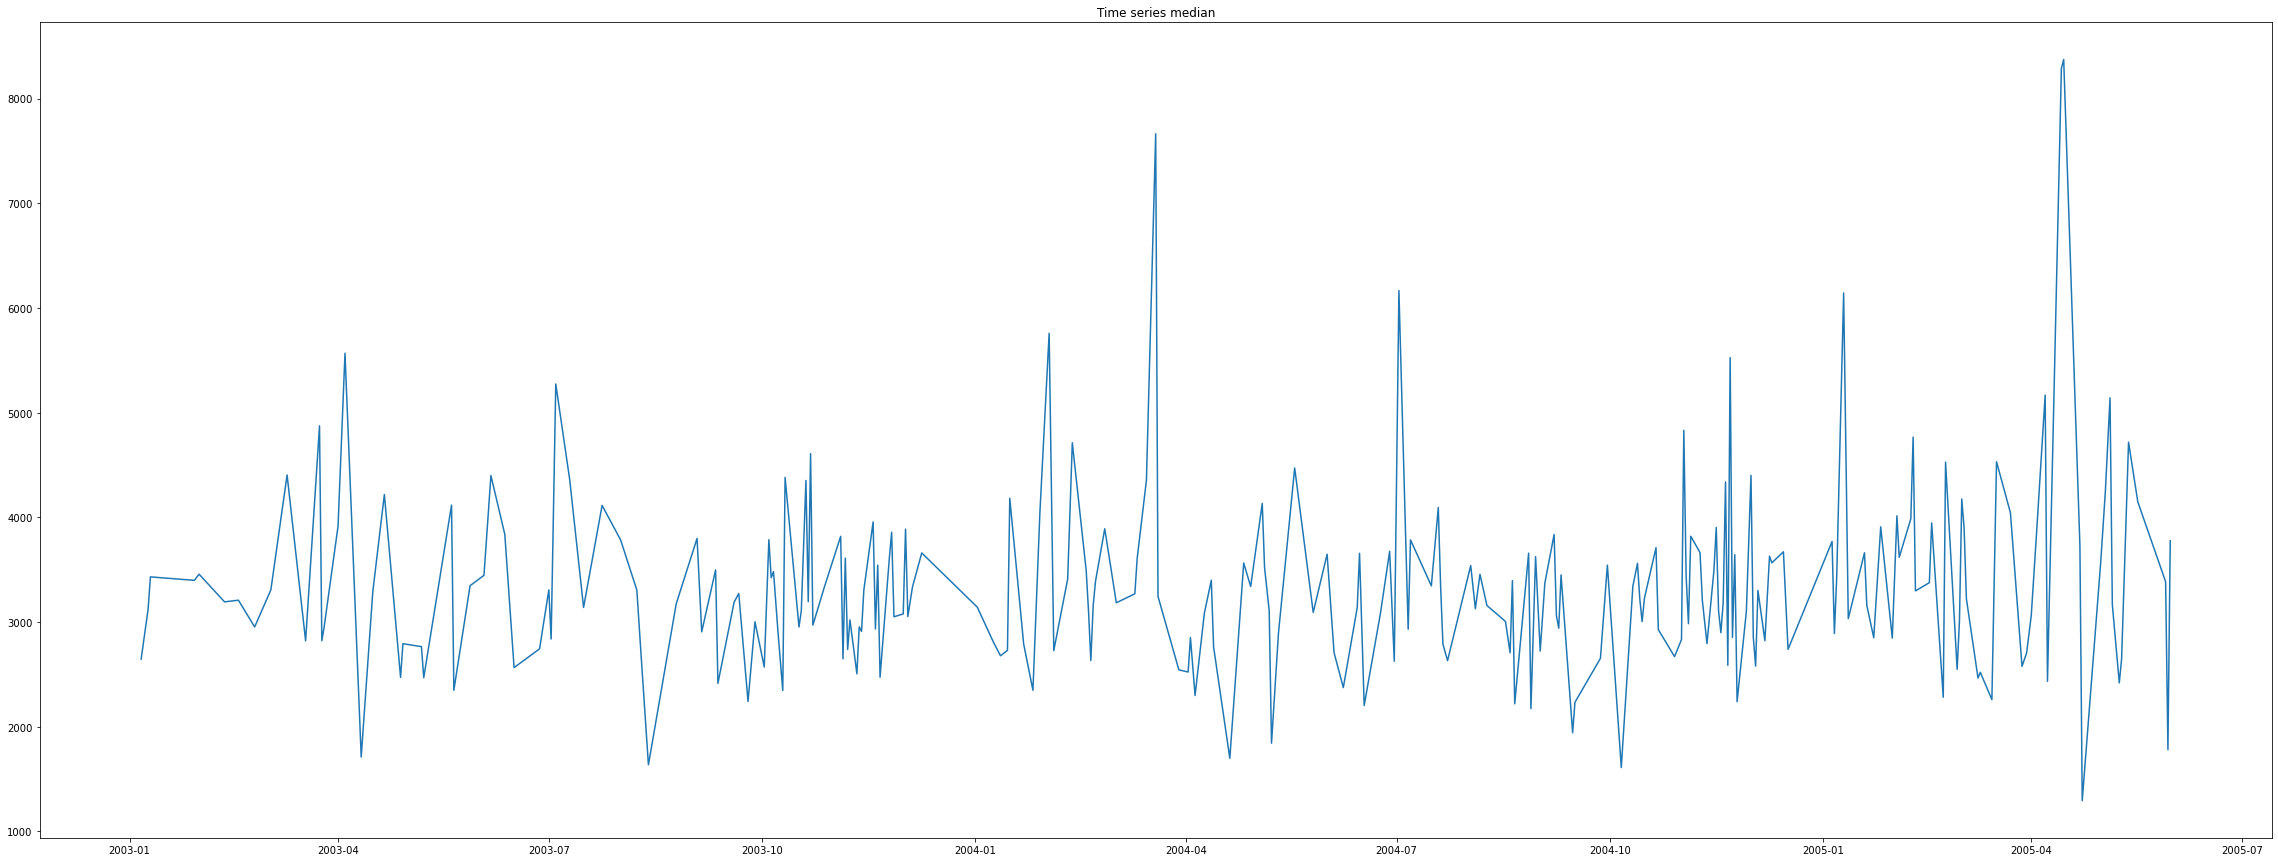

In [13]:
plt.figure(figsize =(40,15))

mean_group = data.groupby(["ORDERDATE"])["SALES"].median()

plt.plot(mean_group)

plt.title("Time series median")

plt.show()

In [14]:
#Data Visulazion group by Std

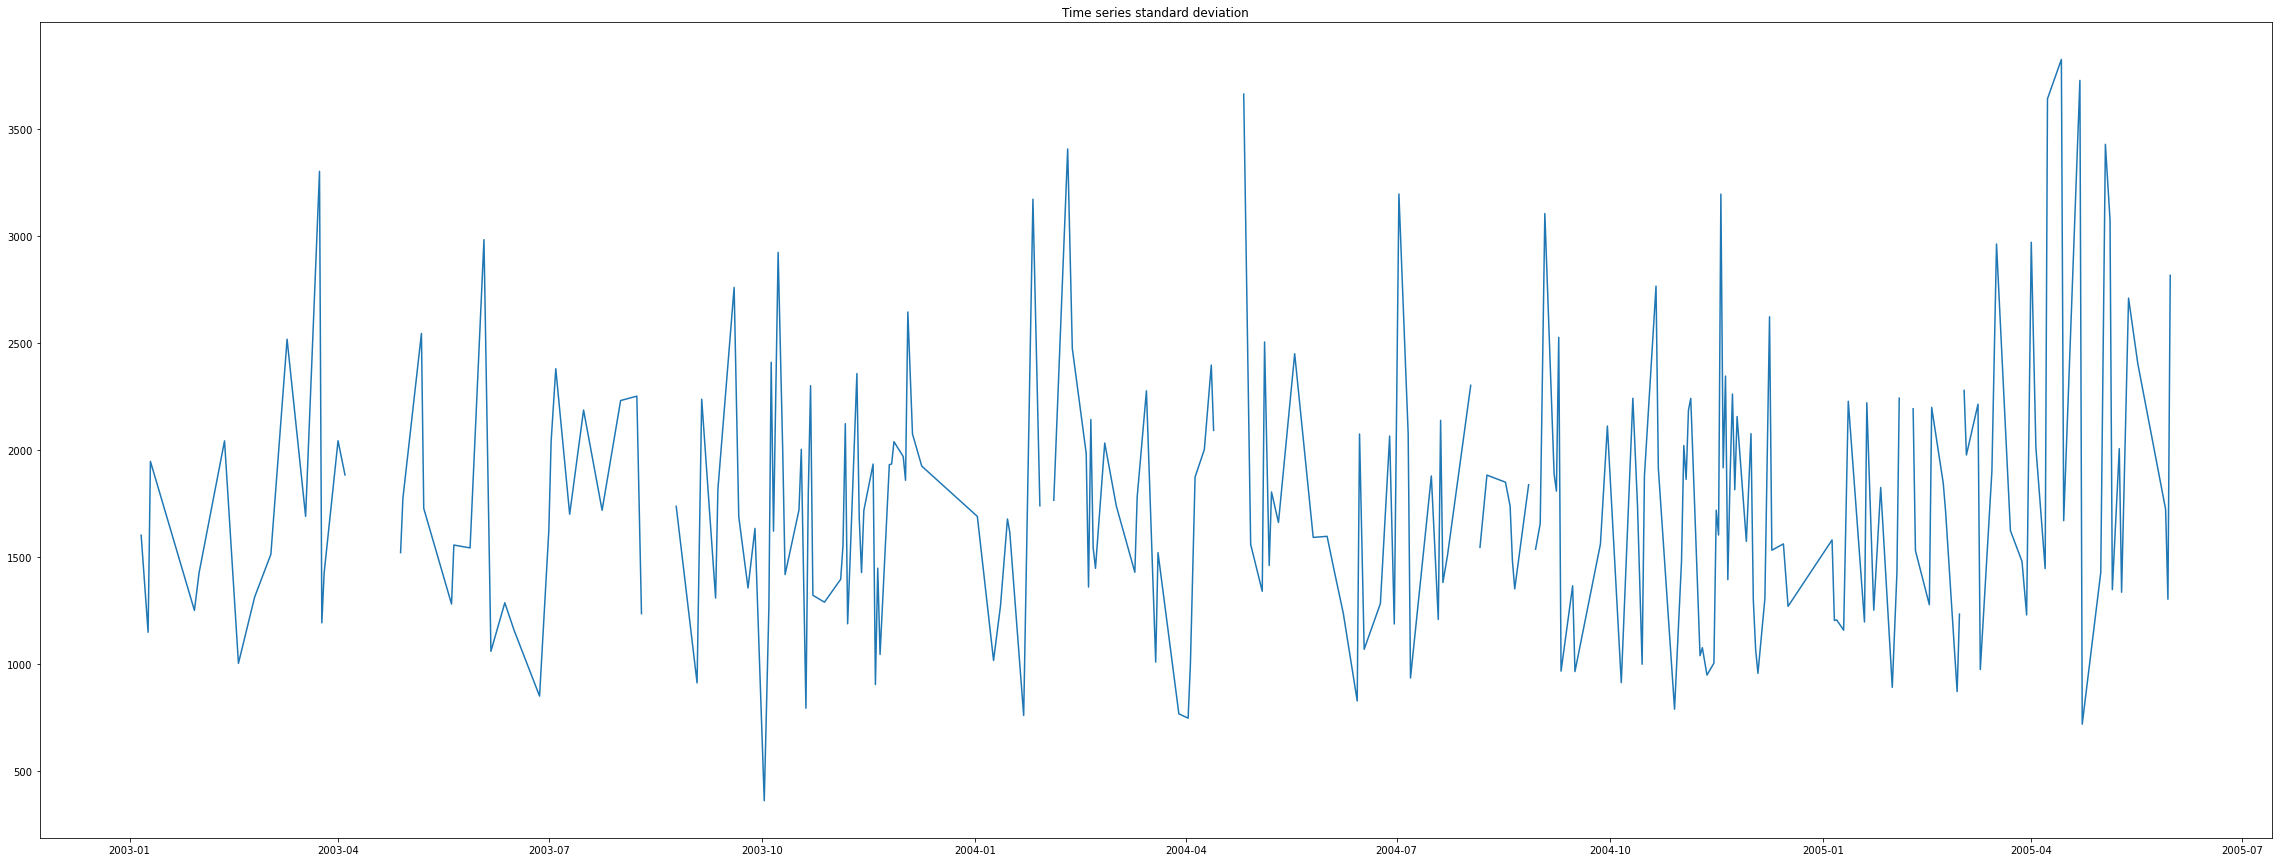

In [15]:
plt.figure(figsize =(40,15))

mean_group = data.groupby(["ORDERDATE"])["SALES"].std()

plt.plot(mean_group)

plt.title("Time series standard deviation")

plt.show()

In [16]:
data.index

RangeIndex(start=0, stop=2823, step=1)

# Autoregression Model:

An autoregressive model is when a value from a time series is regressed on previous values from that same time series. for example, y(t) or y(t-1).

The equation of autoregression is given by

y(t) = b(0) +b(1) y(t-1) +b(2)y(t-2) + b(3)y(t-3)+ ......

# Data Preprocessing for AR model

In [17]:
forcast = data[["ORDERDATE","SALES"]]

forcast = forcast.sort_values("ORDERDATE").reset_index()

forcast = forcast.drop("index", axis = True)

forcast["ORDERDATE"] = forcast["ORDERDATE"].astype("datetime64[ns]")

forcast.head(10)

,ORDERDATE,SALES
0,2003-01-06,5151.00
1,2003-01-06,3390.00
2,2003-01-06,1903.22
3,2003-01-06,1689.03
4,2003-01-09,1404.00
5,2003-01-09,2472.96
6,2003-01-09,3782.00
7,2003-01-09,3773.38
8,2003-01-10,2055.74
9,2003-01-10,4808.31


In [18]:
forcast["ORDERDATE"].min(), forcast["ORDERDATE"].max()

(Timestamp('2003-01-06 00:00:00'), Timestamp('2005-05-31 00:00:00'))

In [19]:
leng = len(forcast["ORDERDATE"])
leng

2823

In [20]:
forcast.set_index("ORDERDATE", inplace = True)

forcast.tail(20)

,SALES
ORDERDATE,
2005-05-30,1875.09
2005-05-31,12001.00
2005-05-31,5510.54
2005-05-31,4325.16
2005-05-31,1556.62
2005-05-31,7182.00
2005-05-31,1030.44
2005-05-31,935.18
2005-05-31,3722.32


In [21]:
forcast.index

DatetimeIndex(['2003-01-06', '2003-01-06', '2003-01-06', '2003-01-06',
               '2003-01-09', '2003-01-09', '2003-01-09', '2003-01-09',
               '2003-01-10', '2003-01-10',
               ...
               '2005-05-31', '2005-05-31', '2005-05-31', '2005-05-31',
               '2005-05-31', '2005-05-31', '2005-05-31', '2005-05-31',
               '2005-05-31', '2005-05-31'],
              dtype='datetime64[ns]', name='ORDERDATE', length=2823, freq=None)

In [22]:
#model fitting on Data

model = AR(forcast)

model_fit = model.fit()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
/opt/co

In [23]:
#make prediction
#import statsmodels.tsa.ar_model.ARResultsWrapper.predict 
yhat = model_fit.predict(start = 2800, end = 2823)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [24]:
yhat.columns = ["SALES"]

yhat.head()

2800    3474.064735
2801    3646.485128
2802    3332.431412
2803    3333.972648
2804    3377.303392
dtype: float64

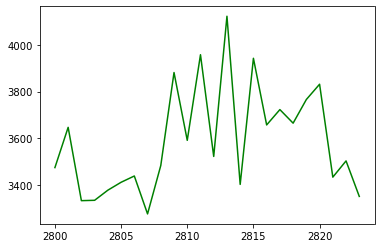

In [25]:
plt.plot(yhat, color = "green", label = "predicted")

plt.show()

# AR Moving Average(MA) Model

In [26]:
mod2 = ARMA(forcast["SALES"], order = (2,1))

res2 = mod2.fit(disp=False)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [27]:
yhat2 = res2.predict(start = 2823,end = 3000)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


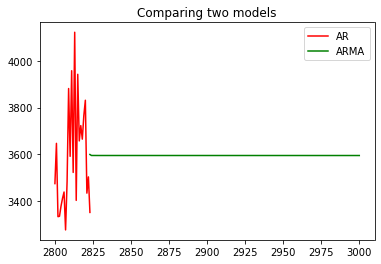

In [28]:
#plt.plot(test_forcast, color='blue', label='Original')

plt.plot(yhat, color='red', label='AR')

plt.plot(yhat2, color='green', label='ARMA')

plt.legend(loc='best')

plt.title('Comparing two models')

plt.show(block=False)

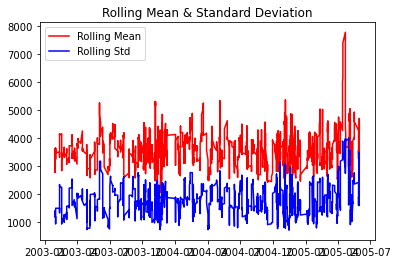

In [29]:
mvg_avg = forcast.rolling(window = 12). mean()

mvg_std = forcast.rolling(window = 12). std()

#orig = plt.plot(forcast, color='blue', label='Original')
mean = plt.plot(mvg_avg, color='red', label='Rolling Mean')

std = plt.plot(mvg_std, color='blue', label='Rolling Std')

plt.legend(loc='best')

plt.title('Rolling Mean & Standard Deviation')

plt.show(block=False)

Resampling the datetime data.
Here we use the start of each month as the timestamp and take the 
average daily sales value for a particular month since working with
the current datetime data becomes tricky
Taking a look at the furniture sales data for the year 2003

In [30]:
y = forcast['SALES'].resample('MS').mean()

forcast["2003":].head()

,SALES
ORDERDATE,
2003-01-06,5151.00
2003-01-06,3390.00
2003-01-06,1903.22
2003-01-06,1689.03
2003-01-09,1404.00


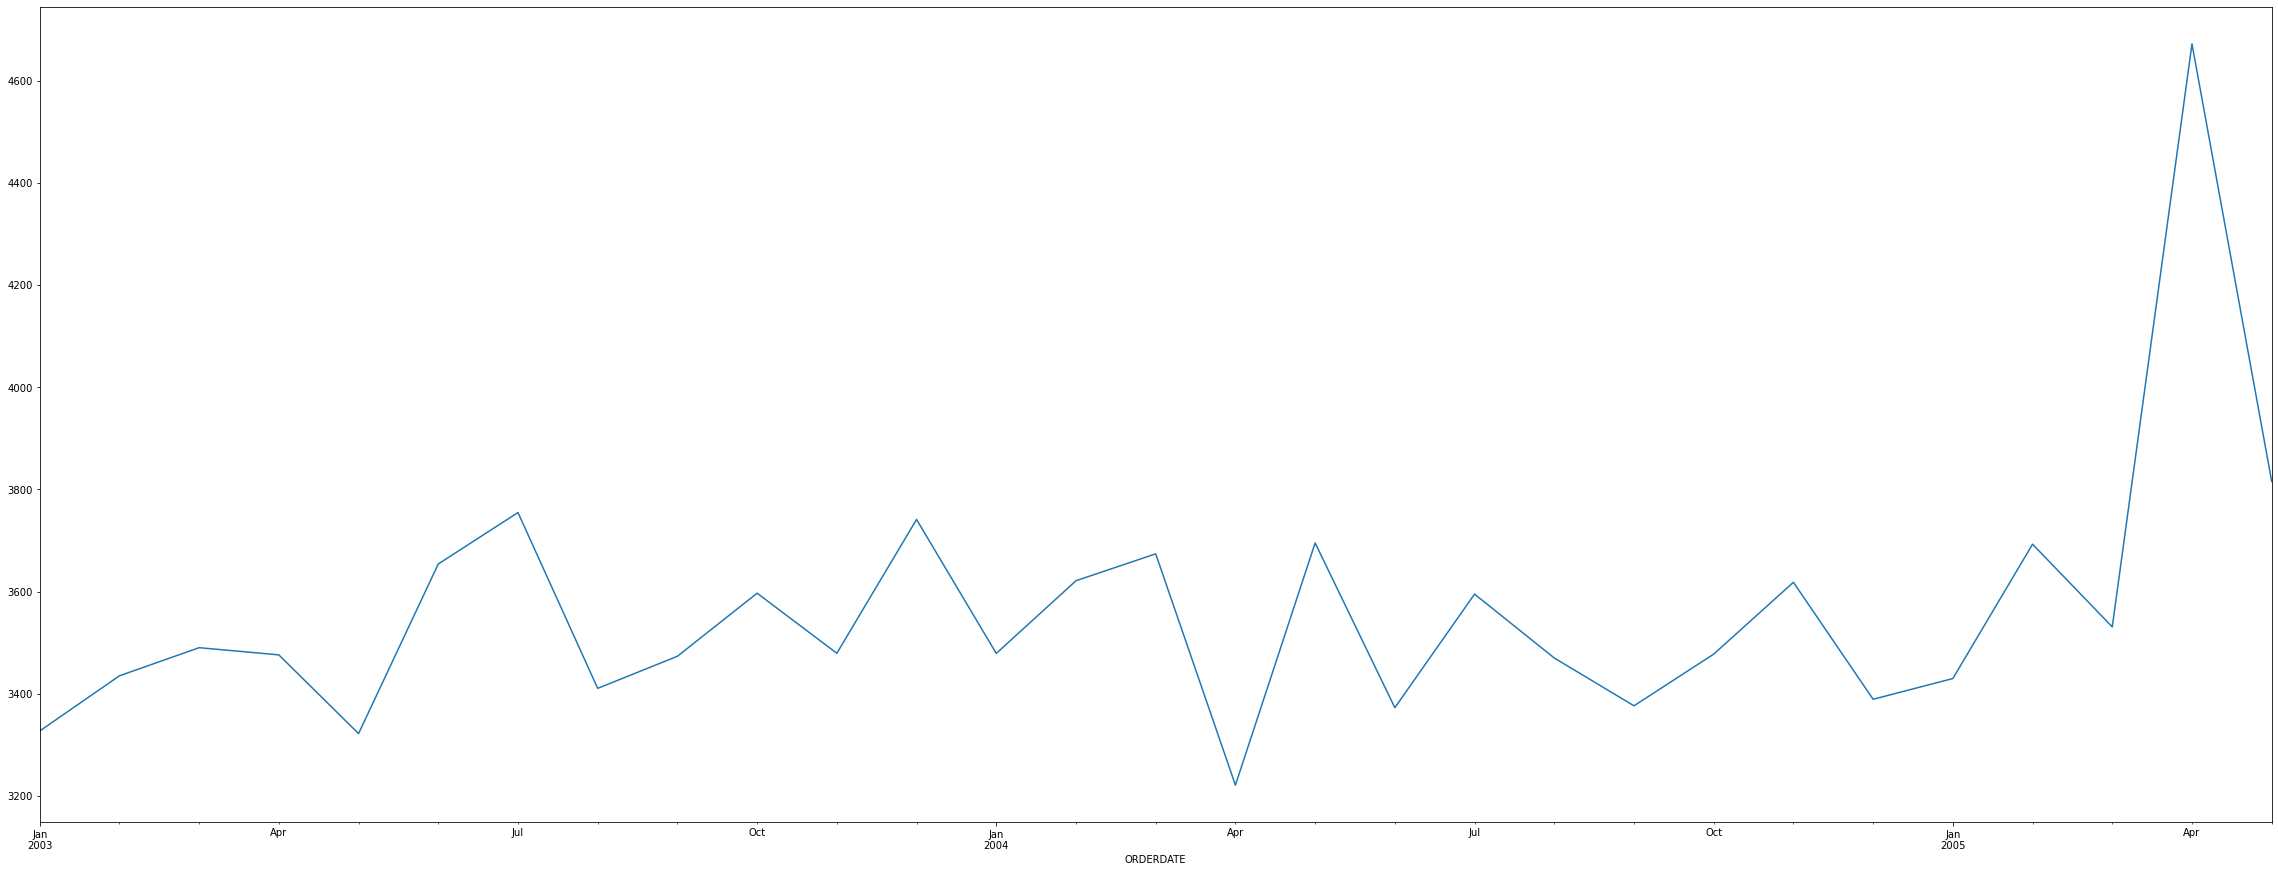

In [31]:
#Plot to see sales data visually
y.plot(figsize = (40,15))

plt.show()

# Checking Stationarity

* What is stationary
*
* Stationarity’ is one of the most important concepts you will come across when working with time series data. A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.
* 
* In time-series analysis we must check whether the data follow any treand, seanality, or residual effects or not, and if there is any such effect then our first step is to remove them. Augmented Dickey-Fuller(ADF) statistics is one of the most popular statistics technique to check where the data is stationary or non-stationary. It uses a autoregressive model optimize and optimizes an information criteria across multiple different lag value. The Hypotesis in this case is that the time series can be represented by a unit root, that is non stationary(has some time dependent structure). The alternative hypothesis is that the time series is stationary.

In [32]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print("ADF Statistics", result[0])

print("P value", result[1])

ADF Statistics -1.5804852948833341
P value 0.4933885354676517


# P-value : https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

In [33]:
print('Results of Dickey Fuller Test:')

dftest = adfuller(forcast['SALES'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -51.921606
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2822.000000
Critical Value (1%)              -3.432669
Critical Value (5%)              -2.862565
Critical Value (10%)             -2.567315
dtype: float64


For a Time series to be stationary, its ADCF test should have:

* p-value to be low (according to the null hypothesis)
 
* The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics From the above ADCF test result, we see that p-value(at max can be.0) is very negligible. Also critical values are very close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is stationary

1. As the data follows some seasonality issue, 
1. so we need to remove those patterns 
1. using transformation and seasonal differentiation
1. 

In [34]:
#Transformation
forcast["SALES_log"] = np.log(forcast["SALES"])

#forcast["log_difference"] = forcast["SALES_log"] - forcast["SALES_log"].shift(1)

forcast_diff = forcast["SALES_log"]

#forcast["log_difference"].dropna().plot()

Seasonal differentiation In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt‘ = yt – y(t-n)

n=7

Time Series Forcasting : ARIMA Model ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p) AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results. An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4. The ACF and PACF plots for the TS after differencing can be plotted as:

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


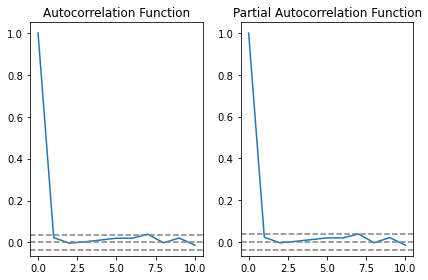

In [35]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(forcast["SALES"], nlags=10)
lag_pacf = pacf(forcast["SALES"], nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(forcast["SALES"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(forcast["SALES"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(forcast["SALES"])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(forcast["SALES"])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

Plotting AR model


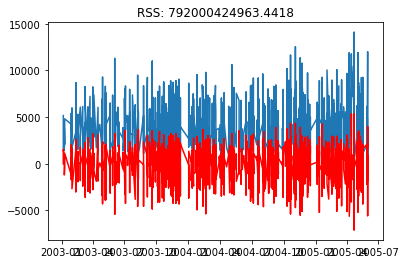

In [36]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(forcast["SALES"], order=(2,1,0))

results_AR = model.fit(disp=-1)

plt.plot(forcast["SALES"])

plt.plot(results_AR.fittedvalues, color='red')

plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - forcast["SALES"])**2))

print('Plotting AR model')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


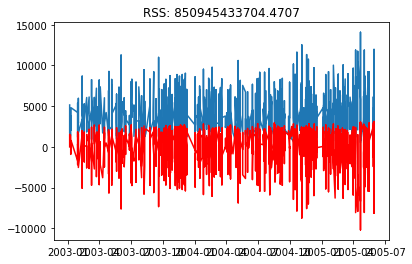

In [37]:
model = ARIMA(forcast["SALES"], order=(0,1,2))

results_AR = model.fit(disp=-1)

plt.plot(forcast["SALES"])

plt.plot(results_AR.fittedvalues, color='red')

plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - forcast["SALES"])**2))

print('Plotting AR model')


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silenc

Plotting ARIMA model


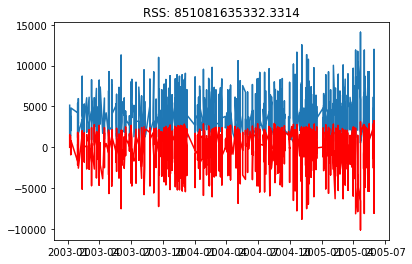

In [38]:
# AR+I+MA = ARIMA model
model = ARIMA(forcast["SALES"], order=(2,1,2))

results_ARIMA = model.fit(disp=-1)

plt.plot(forcast["SALES"])

plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - forcast["SALES"])**2))

print('Plotting ARIMA model')

# Prediction and reverse transformation

In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print(predictions_ARIMA_diff.head())

ORDERDATE
2003-01-06       0.081519
2003-01-06     856.784016
2003-01-06    1553.914726
2003-01-09    1315.422422
2003-01-09    1289.641793
dtype: float64


In [40]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

print(predictions_ARIMA_diff_cumsum.head(10))

ORDERDATE
2003-01-06       0.081519
2003-01-06     856.865535
2003-01-06    2410.780261
2003-01-09    3726.202683
2003-01-09    5015.844475
2003-01-09    5210.549991
2003-01-09    4290.349009
2003-01-10    3478.750088
2003-01-10    4259.612501
2003-01-29    2541.530676
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(forcast['SALES'].iloc[0], index=forcast.index)

predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

predictions_ARIMA_log.head()

ORDERDATE
2003-01-06    5151.081519
2003-01-06    6007.865535
2003-01-06    7561.780261
2003-01-06    5151.081519
2003-01-06    6007.865535
dtype: float64

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


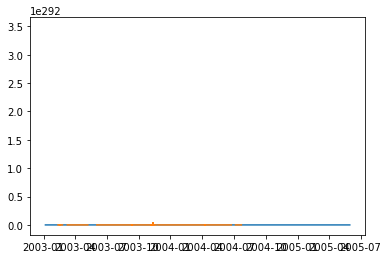

In [42]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.plot(forcast["SALES"])

plt.plot(predictions_ARIMA)

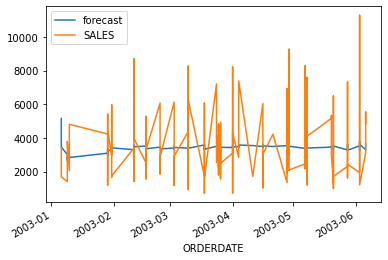

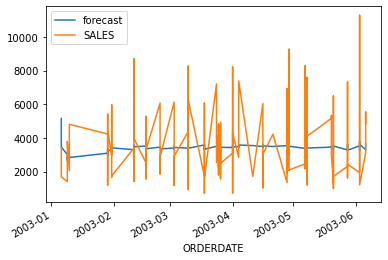

In [43]:

results_ARIMA.plot_predict(1,264) 

for Deep Understanding ,

Pls visit the link: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/